In [1]:
import datetime
from nsepy import get_history
import pandas as pd
import sys
from datetime import date
import datetime
from fbprophet import Prophet
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
import warnings
import seaborn as sns
import yfinance as yf
import mpl_finance
import streamlit as st

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
warnings.warn("deprecated", DeprecationWarning)
%matplotlib inline

import pickle

/Users/vaigupta/Documents/Notebooks/anaconda3/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


ImportError: dlopen(/Users/vaigupta/Documents/Notebooks/anaconda3/lib/python3.7/site-packages/tensorflow/python/_pywrap_tfe.so, 0x0002): Library not loaded: @rpath/_pywrap_tensorflow_internal.so
  Referenced from: <FCAAE016-CAE0-35A3-83C9-30B6B11E8ED7> /Users/vaigupta/Documents/Notebooks/anaconda3/lib/python3.7/site-packages/tensorflow/python/_pywrap_tfe.so
  Reason: tried: '/Users/vaigupta/Documents/Notebooks/anaconda3/lib/python3.7/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utfe.so___Utensorflow/_pywrap_tensorflow_internal.so' (no such file), '/Users/vaigupta/Documents/Notebooks/anaconda3/lib/python3.7/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal_Umacos___Utensorflow_Spython/_pywrap_tensorflow_internal.so' (no such file), '/Users/vaigupta/Documents/Notebooks/anaconda3/lib/python3.7/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so' (no such file), '/Users/vaigupta/Documents/Notebooks/anaconda3/lib/python3.7/site-packages/tensorflow/python/../_pywrap_tensorflow_internal.so' (no such file), '/Users/vaigupta/Documents/Notebooks/anaconda3/lib/python3.7/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utfe.so___Utensorflow/_pywrap_tensorflow_internal.so' (no such file), '/Users/vaigupta/Documents/Notebooks/anaconda3/lib/python3.7/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal_Umacos___Utensorflow_Spython/_pywrap_tensorflow_internal.so' (no such file), '/Users/vaigupta/Documents/Notebooks/anaconda3/lib/python3.7/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so' (no such file), '/Users/vaigupta/Documents/Notebooks/anaconda3/lib/python3.7/site-packages/tensorflow/python/../_pywrap_tensorflow_internal.so' (no such file), '/Users/vaigupta/Documents/Notebooks/anaconda3/lib/_pywrap_tensorflow_internal.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/vaigupta/Documents/Notebooks/anaconda3/lib/_pywrap_tensorflow_internal.so' (no such file), '/Users/vaigupta/Documents/Notebooks/anaconda3/lib/_pywrap_tensorflow_internal.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/vaigupta/Documents/Notebooks/anaconda3/lib/_pywrap_tensorflow_internal.so' (no such file), '/Users/vaigupta/Documents/Notebooks/anaconda3/bin/../lib/_pywrap_tensorflow_internal.so' (no such file), '/Users/vaigupta/Documents/Notebooks/anaconda3/lib/_pywrap_tensorflow_internal.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/vaigupta/Documents/Notebooks/anaconda3/lib/_pywrap_tensorflow_internal.so' (no such file), '/Users/vaigupta/Documents/Notebooks/anaconda3/lib/_pywrap_tensorflow_internal.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/vaigupta/Documents/Notebooks/anaconda3/lib/_pywrap_tensorflow_internal.so' (no such file), '/Users/vaigupta/Documents/Notebooks/anaconda3/bin/../lib/_pywrap_tensorflow_internal.so' (no such file), '/usr/local/lib/_pywrap_tensorflow_internal.so' (no such file), '/usr/lib/_pywrap_tensorflow_internal.so' (no such file, not in dyld cache)

In [2]:
equity = yf.Ticker("INDUSINDBK.NS")

In [43]:
data_tf = equity.history(period="600d",interval='1h')
data_tf_15 = equity.history(period="60d",interval='15m')
data_tf_5 = equity.history(period="60d",interval='5m')

In [4]:
startdate = dt.datetime.strptime("2022-02-01", "%Y-%m-%d").date()

data_tf = equity.history(interval='15m',startdate=startdate)

<IPython.core.display.Javascript object>

In [13]:
data_tf.shape

(4145, 7)

In [12]:
data_tf = data_tf[:'2022-02-14 13:15:00+05:30']
data_tf_15 = data_tf_15[:'2022-02-14 13:15:00+05:30']
data_tf_5 = data_tf_5[:'2022-02-14 13:15:00+05:30']

## Calculate Simple Moving Average [SMA]

In [1713]:
data_tf['pct_change']= data_tf[['Close']].pct_change()

In [848]:
data_tf['pct_change_volume']= data_tf[['Volume']].pct_change()

In [849]:
data_tf['SMA_10'] = data_tf.Close.rolling(10, min_periods=1).mean()
data_tf['SMA_22'] = data_tf.Close.rolling(22, min_periods=1).mean()
data_tf['SMA_44'] = data_tf.Close.rolling(44, min_periods=1).mean()

In [850]:
data_tf['EMA_10'] = data_tf.Close.ewm(span=10).mean()
data_tf['EMA_22'] = data_tf.Close.ewm(span=22).mean()
data_tf['EMA_44'] = data_tf.Close.ewm(span=44).mean()

In [1209]:
x=pd.concat([x,x_vol],axis = 1,join='inner')
col_header = np.arange(0, 60, dtype=int)
x.columns = col_header

<IPython.core.display.Javascript object>

# begin # ###

# Code Implementaiton Fresh -2

#converting dataset into x_train and y_train


In [55]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(data_tf[['vol_change']])

scaler_pct = MinMaxScaler(feature_range=(-1, 1))
scaled_pct = scaler_pct.fit_transform(data_tf[['pct_change']])

KeyError: "None of [Index(['vol_change'], dtype='object')] are in the [columns]"

In [ ]:
data_tf['volume_nor']=(data_tf['vol_change']/ min(data_tf['vol_change']))
data_tf['pct_change_nor']=(data_tf['pct_change']/ min(data_tf['pct_change']))

In [1847]:
#data_tf = data_tf[data_tf['Volume']>0].reset_index()
data_tf.head()

,level_0,index,Open,High,Low,Close,Volume,Dividends,Stock Splits,pct_change,change,vol_change,volume_nor,pct_change_nor
0,0,2019-09-06 10:15:00+05:30,1208.300049,1212.699951,1203.000000,1210.000000,3215843,0.0,0,0.004191,1,3215843,-0.123221,-0.044426
1,1,2019-09-06 11:15:00+05:30,1210.199951,1219.000000,1209.400024,1218.050049,2755586,0.0,0,0.006653,1,2755586,-0.105585,-0.070521
2,2,2019-09-06 12:15:00+05:30,1217.699951,1229.000000,1215.250000,1224.650024,4743612,0.0,0,0.005418,1,4743612,-0.181760,-0.057436
3,3,2019-09-06 13:15:00+05:30,1225.449951,1226.500000,1216.000000,1219.000000,1778483,0.0,0,-0.004614,-1,-1778483,0.068146,0.048904
4,4,2019-09-06 14:15:00+05:30,1220.550049,1225.000000,1216.000000,1223.400024,2289456,0.0,0,0.003610,1,2289456,-0.087725,-0.038261


In [1744]:
data_tf['change'] = data_tf['pct_change'].apply(lambda x: 1 if x>0 else -1)
data_tf['vol_change'] = data_tf['change'] * data_tf['Volume']

In [1873]:
lookback_period = 30
x, y = [], []
for i in range(lookback_period,len(data_tf)):
    x.append(data_tf['volume_nor'].values[i-lookback_period:i])
    y.append(data_tf['pct_change_nor'].values[i])

In [1874]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [1875]:
train = round(len(x)*0.90) 
val =  round(len(x)*0.90) 
test =  round(len(x))

In [1876]:
x_train,y_train = x[:train],y[:train]
x_val,y_val = x[train:val],y[train:val]
x_test,y_test = x[val:test],y[val:test]

In [1877]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,activation = 'relu'))
model.add(Dense(1))

In [1878]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae','mape'])
model_history  = model.fit(x_train, y_train, epochs=5, batch_size=5, verbose=1,validation_data=[x_val,y_val] )

Epoch 1/5
656/656 [==============================] - 12s 14ms/step - loss: 0.0059 - mae: 0.0436 - mape: 28904.5840
Epoch 2/5
656/656 [==============================] - 8s 13ms/step - loss: 0.0059 - mae: 0.0435 - mape: 31065.7715
Epoch 3/5
656/656 [==============================] - 9s 13ms/step - loss: 0.0059 - mae: 0.0433 - mape: 24424.6758
Epoch 4/5
656/656 [==============================] - 9s 13ms/step - loss: 0.0059 - mae: 0.0434 - mape: 16477.5645
Epoch 5/5
656/656 [==============================] - 9s 14ms/step - loss: 0.0059 - mae: 0.0433 - mape: 20943.6406


In [ ]:
## Run the below function everytime

In [14]:
def train_fn(data_tf,lookback_period,epochs,l_event):
  #converting dataset into x_train and y_train
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data_tf[['Close']])  
    
    x, y = [], []
    for i in range(lookback_period,len(data_tf)):
        x.append(scaled_data[i-lookback_period:i,0])
        y.append(scaled_data[i,0])
     
    x = pd.DataFrame(x)
    y = pd.DataFrame(y)

    train = round(len(x)*0.90) 
    val =  round(len(x)*0.90) 
    test =  round(len(x))
    

    x_train,y_train = x[:train],y[:train]
    x_val,y_val = x[train:val],y[train:val]
    x_test,y_test = x[val:test],y[val:test]
    
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50,activation = 'relu'))
    model.add(Dense(1))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae','mape'])
    model_history  = model.fit(x_train, y_train, epochs=epochs, batch_size=5, verbose=1,validation_data=[x_val,y_val] )
    
    
    ## test metrics
    predictions = model.predict(x_test)
    test_predictions = scaler.inverse_transform(predictions)
    test_close_price = scaler.inverse_transform(y_test)
    
    mae=mean_absolute_error(test_predictions[l_event:],test_close_price[l_event:])
    mape = np. mean(np. abs((test_close_price[l_event:] - test_predictions[l_event:]) / test_close_price[l_event:])) * 100
    
    return model_history, model,mae,mape,x_test,y_test,scaler

In [15]:
model_history, model,mae,mape,x_test,y_test,scaler = train_fn(data_tf,lookback_period=30,epochs=50,l_event=-10)

Epoch 1/50
741/741 [==============================] - 13s 14ms/step - loss: 0.0072 - mae: 0.0375 - mape: 36829.8906
Epoch 2/50
741/741 [==============================] - 11s 14ms/step - loss: 6.9713e-04 - mae: 0.0187 - mape: 30913.1094
Epoch 3/50
741/741 [==============================] - 10s 13ms/step - loss: 5.9936e-04 - mae: 0.0177 - mape: 34146.2891
Epoch 4/50
741/741 [==============================] - 10s 14ms/step - loss: 5.1670e-04 - mae: 0.0165 - mape: 28839.4004
Epoch 5/50
741/741 [==============================] - 10s 14ms/step - loss: 3.8535e-04 - mae: 0.0145 - mape: 26212.8203
Epoch 6/50
741/741 [==============================] - 10s 13ms/step - loss: 3.0707e-04 - mae: 0.0127 - mape: 27600.4297
Epoch 7/50
741/741 [==============================] - 10s 14ms/step - loss: 3.2827e-04 - mae: 0.0132 - mape: 24496.4082
Epoch 8/50
741/741 [==============================] - 10s 13ms/step - loss: 2.2854e-04 - mae: 0.0108 - mape: 21706.7773
Epoch 9/50
741/741 [========================

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
model_history_15, model_5,mae_5,mape_5,x_test,y_test,scaler = train_fn(data_tf_5,90,50,-10)
model_history_15, model_15,mae_15,mape_15,x_test,y_test,scaler = train_fn(data_tf_15,60,50,-10)

Epoch 1/50
735/735 [==============================] - 30s 37ms/step - loss: 0.0044 - mae: 0.0353 - mape: 70274.5391
Epoch 2/50
735/735 [==============================] - 37s 50ms/step - loss: 9.0402e-04 - mae: 0.0216 - mape: 69812.5156
Epoch 3/50
735/735 [==============================] - 32s 44ms/step - loss: 5.8823e-04 - mae: 0.0172 - mape: 61886.6914
Epoch 4/50
735/735 [==============================] - 35s 48ms/step - loss: 4.3859e-04 - mae: 0.0145 - mape: 64281.6562
Epoch 5/50
735/735 [==============================] - 31s 42ms/step - loss: 3.5665e-04 - mae: 0.0131 - mape: 55159.5000
Epoch 6/50
735/735 [==============================] - 31s 42ms/step - loss: 3.3938e-04 - mae: 0.0127 - mape: 48941.9727
Epoch 7/50
735/735 [==============================] - 32s 44ms/step - loss: 2.9198e-04 - mae: 0.0119 - mape: 45068.1289
Epoch 8/50
735/735 [==============================] - 33s 44ms/step - loss: 2.8868e-04 - mae: 0.0120 - mape: 39130.5625
Epoch 9/50
735/735 [========================

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/50
240/240 [==============================] - 10s 30ms/step - loss: 0.0284 - mae: 0.1008 - mape: 248631.0781
Epoch 2/50
240/240 [==============================] - 8s 34ms/step - loss: 0.0039 - mae: 0.0464 - mape: 244671.4688
Epoch 3/50
240/240 [==============================] - 8s 33ms/step - loss: 0.0029 - mae: 0.0395 - mape: 225822.5781
Epoch 4/50
240/240 [==============================] - 8s 33ms/step - loss: 0.0025 - mae: 0.0366 - mape: 235105.5469
Epoch 5/50
240/240 [==============================] - 8s 33ms/step - loss: 0.0022 - mae: 0.0345 - mape: 221530.7031
Epoch 6/50
240/240 [==============================] - 7s 29ms/step - loss: 0.0020 - mae: 0.0326 - mape: 226153.5312
Epoch 7/50
240/240 [==============================] - 7s 27ms/step - loss: 0.0016 - mae: 0.0282 - mape: 236738.7188
Epoch 8/50
240/240 [==============================] - 6s 27ms/step - loss: 0.0014 - mae: 0.0273 - mape: 241335.8906
Epoch 9/50
240/240 [==============================] - 6s 26ms/step - lo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
mae_5

1.6677978515625227

In [16]:
mae

7.617779541015591

In [20]:
mae_15

2.9772094726562615

In [21]:
mape

0.7922484240339672

In [ ]:
### testing predicitons

In [68]:
#plt.plot(model_history.history['loss'], label ='Loss')
plt.plot(model_15.history['mae'], label ='MAE')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")

<IPython.core.display.Javascript object>

TypeError: 'History' object is not subscriptable

In [1456]:
pickle.dump(model,open('Equity_Simulator/Model_Output/KPIT_02_01.pkl','wb'))

2022-02-02 12:23:52.380 WARNING absl: Found untraced functions such as lstm_cell_73_layer_call_fn, lstm_cell_73_layer_call_and_return_conditional_losses, lstm_cell_73_layer_call_fn, lstm_cell_73_layer_call_and_return_conditional_losses, lstm_cell_73_layer_call_and_return_conditional_losses while saving (showing 5 of 5). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: ram://26865bb0-8cd3-4dce-95f9-61ec8b089a7f/assets
2022-02-02 12:23:53.230 INFO    tensorflow: Assets written to: ram://26865bb0-8cd3-4dce-95f9-61ec8b089a7f/assets
2022-02-02 12:23:53.366 WARNING absl: <keras.layers.recurrent.LSTMCell object at 0x7facbf0acf60> has the same name 'LSTMCell' as a built-in Keras object. Consider renaming <class 'keras.layers.recurrent.LSTMCell'> to avoid naming conflicts when loading with `tf.keras.models.load_model`. If renaming is not possible, pass the object in the `custom_objects` parameter of the load function.
2022-02-02 12:23:53.367 WARNIN

## Futre Prediction

In [63]:
lookback_period = 30
scaled_data = scaler.fit_transform(data_tf[['Close']])
x_future = scaled_data[len(data_tf)-lookback_period:]
x_future = pd.DataFrame(x_future)

In [65]:
len(data_tf)-lookback_period

4145

In [42]:
prediction_output = []
current_time = datetime.datetime.now()
for pred in range(0,4):
    prediction = model.predict(x_future[len(x_future)-lookback_period:].reset_index(drop=True).transpose().reset_index(drop=True))
    prediction_output.append((pred,prediction[0][0],current_time))
    x_future.loc[len(x_future)] =prediction[0][0]

In [43]:
scaler.inverse_transform(np.reshape(prediction,(-1,1)))[0][0]

<IPython.core.display.Javascript object>

967.23126

In [1928]:
scaler.inverse_transform(x_future[lookback_period:])

array([[2321.36268953],
       [2311.32957546],
       [2301.29457542],
       [2291.03292671]])

In [1557]:
scaler.inverse_transform(x_future[lookback_period:])

array([[660.14172887],
       [660.49760599],
       [663.32636801],
       [667.78683839]])

In [1927]:
prediction_output

[(0, 0.77376103, datetime.datetime(2022, 2, 5, 4, 25, 42, 619000)),
 (1, 0.7683705, datetime.datetime(2022, 2, 5, 4, 25, 42, 619000)),
 (2, 0.762979, datetime.datetime(2022, 2, 5, 4, 25, 42, 619000)),
 (3, 0.75746566, datetime.datetime(2022, 2, 5, 4, 25, 42, 619000))]

In [957]:
pd.DataFrame(model.get_weights())

,0
0,"[[0.20312336, -0.29926926, -0.118204005, -0.18..."
1,"[[0.059970282, -0.12312792, -0.17932947, 0.100..."
2,"[0.08393159, -0.0587749, 0.031807628, 0.035324..."
3,"[[-0.05743722, -0.10930421, -0.03680757, 0.104..."
4,"[[-0.0289561, 0.14939587, -0.022605663, -0.038..."
5,"[-0.007895476, -0.059496578, -0.024170022, 0.0..."
6,"[[0.17462194], [0.10821851], [-0.28848192], [-..."
7,[0.0526044]


In [49]:
np.reshape(scaled_data[10:12],(1,-1))

<IPython.core.display.Javascript object>

array([[0.52744799, 0.5322634 ]])

In [77]:
scaled_data.shape

(4176, 1)

In [ ]:
## Future prediction

In [29]:
lookback_period = 30
scaled_data = scaler.fit_transform(data_tf[['Close']])

In [26]:
data_tf = equity.history(period="600d",interval='1h')

In [41]:
prediction_out = []
for x in range(4100,len(scaled_data)):
    prediction_value = model.predict(np.reshape(scaled_data[x-lookback_period:x,0],(1,-1)))
    prediction_out.append((x,scaler.inverse_transform(prediction_value)[0][0]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
x_future = pd.DataFrame(prediction_out).set_index([0])
data_tf.reset_index().merge(x_future, right_index=True,left_index=True).to_clipboard()

In [44]:
prediction_out

[(4100, 965.0013),
 (4101, 954.6521),
 (4102, 949.8091),
 (4103, 957.4433),
 (4104, 956.9447),
 (4105, 955.19543),
 (4106, 951.3892),
 (4107, 944.1171),
 (4108, 940.5454),
 (4109, 937.2129),
 (4110, 935.3426),
 (4111, 934.66077),
 (4112, 932.57825),
 (4113, 923.4845),
 (4114, 918.65515),
 (4115, 923.64435),
 (4116, 926.6898),
 (4117, 930.2253),
 (4118, 938.9515),
 (4119, 938.22986),
 (4120, 952.75256),
 (4121, 962.0315),
 (4122, 967.337),
 (4123, 965.2023),
 (4124, 968.83124),
 (4125, 967.69293),
 (4126, 967.19867),
 (4127, 970.4547),
 (4128, 974.04895),
 (4129, 971.32104),
 (4130, 973.62054),
 (4131, 971.73065),
 (4132, 971.7215),
 (4133, 972.56946),
 (4134, 964.11163),
 (4135, 975.1663),
 (4136, 977.1981),
 (4137, 987.52783),
 (4138, 983.02356),
 (4139, 985.60187),
 (4140, 977.38794),
 (4141, 949.6863),
 (4142, 955.59674),
 (4143, 950.9222),
 (4144, 954.70984),
 (4145, 949.2811),
 (4146, 942.0582),
 (4147, 938.2639),
 (4148, 928.6469),
 (4149, 933.9745),
 (4150, 940.19037),
 (4151, 9

## technical analysis

In [115]:
for move in range(0,len(data_tf)-1):
    if (data_tf['Low'][move+1]) >= (data_tf['Low'][move] * 1.01):
        data_tf['movement'][move+1]=1

/Users/vaigupta/Documents/Notebooks/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
data_tf['Low'][0+1] * 1.05

160.65

In [90]:
data_tf['Low'][0]

153.3000030517578

In [100]:
data_tf[['Low']].apply(lambda x: 1 if x+1 > (x*1.01) else 0)

ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', 'occurred at index Low')

In [1252]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
  return support
def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2]
  return resistance

In [1253]:
levels = []
for i in range(2,data_tf.shape[0]-2):
  if isSupport(data_tf,i):
    levels.append((i,data_tf['Low'][i],'Support'))
  elif isResistance(data_tf,i):
    levels.append((i,data_tf['High'][i],'Resistance'))

In [1248]:
def plot_all():
  fig, ax = plt.subplots()
  candlestick_ohlc(ax,data_tf.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
  fig.show()

<IPython.core.display.Javascript object>

/Users/vaigupta/Documents/Notebooks/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


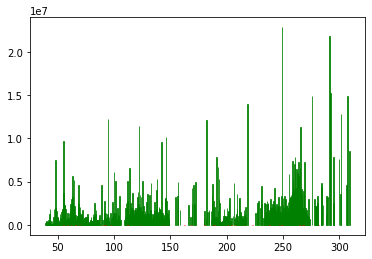

In [1249]:
plot_all()

In [1283]:
levels = pd.DataFrame(levels)
levels.set_index(0,inplace=True)

In [1278]:
data_tf = data_tf.reset_index().rename(columns={'index':'Date'})

In [1288]:
data_tf = data_tf.merge(levels,left_on=data_tf.index,right_on=levels.index,how='left')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

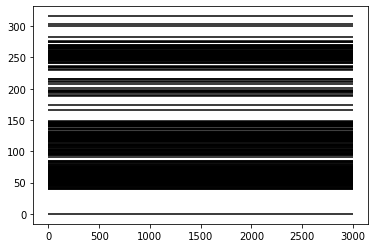

In [1300]:
for level in levels[1]:
    plt.hlines(level,xmin=0,xmax=3000)

In [1306]:
data_tf[data_tf[2]=='Resistance']

,key_0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,1,2
20,20,2020-01-31 15:15:00+05:30,54.399998,56.666668,53.566666,54.916668,156172,0.0,0.0,56.666668,Resistance
29,29,2020-02-04 10:15:00+05:30,55.216663,56.899998,54.333332,56.000000,9697306,0.0,0.0,56.899998,Resistance
104,104,2020-02-18 15:15:00+05:30,61.833332,62.299999,61.483334,61.916668,0,0.0,0.0,62.299999,Resistance
121,121,2020-02-24 11:15:00+05:30,64.299995,64.616669,63.266666,63.866669,314995,0.0,0.0,64.616669,Resistance
140,140,2020-02-27 09:15:00+05:30,61.183334,65.000000,61.183334,63.149998,36387,0.0,0.0,65.000000,Resistance
208,208,2020-03-12 14:15:00+05:30,50.000000,50.316666,49.683334,49.983334,933058,0.0,0.0,50.316666,Resistance
219,219,2020-03-16 11:15:00+05:30,48.350002,48.666668,48.266666,48.383331,162618,0.0,0.0,48.666668,Resistance
224,224,2020-03-17 09:15:00+05:30,50.033337,50.033337,47.000000,48.066666,13909,0.0,0.0,50.033337,Resistance
231,231,2020-03-18 09:15:00+05:30,49.750000,49.750000,46.016666,46.666668,9818,0.0,0.0,49.750000,Resistance
242,242,2020-03-19 13:15:00+05:30,43.350002,46.200001,43.350002,45.000000,469951,0.0,0.0,46.200001,Resistance
